# Loading Data

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [2]:
df= pd.read_csv("athlete_events.csv")
region_df=pd.read_csv("noc_regions.csv")

In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
df.shape

(271116, 15)

We will only work on summer olympics data

In [5]:
df=df[df['Season']=='Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

In [8]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

# Pre-Processing

In [9]:
df=df.merge(region_df,on='NOC', how='left')
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN  

[222552 rows x 17 columns]

In [10]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df['region'].unique().shape

(206,)

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

Check and delete duplicate rows

In [13]:
df.duplicated().sum()

1385

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [17]:
pd.get_dummies(df['Medal'])

Bronze   Gold  Silver
0        False  False   False
1        False  False   False
2        False  False   False
3        False   True   False
4        False  False   False
...        ...    ...     ...
222547   False  False   False
222548   False  False   False
222549   False  False   False
222550   False  False   False
222551   False  False   False

[221167 rows x 3 columns]

In [18]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [19]:
df.shape

(221167, 20)

In [20]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  Bronze   Gold  Silver  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False

filter medals with NOC(Region)

In [21]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values(['Gold','Silver','Bronze'],ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  VIN     0       0       0
226  VNM     0       0       0
227  YAR     0       0       0
228  YEM     0       0       0
229  YMD     0       0       0

[230 rows x 4 columns]

In [22]:
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN   False  True   False  
4190    Gold  India   NaN   False  True   False  
4460    Gold  India   NaN   False  True   False  
4461    Gold  India   NaN   False  True   False  
4462    Gold  India   NaN   False  True   False  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN   False  True   False  
193964  Gold  India   NaN   False  True   False  
193965  Gold  India   NaN   False  True   False  
205949  Gold  India   NaN   False  True   False  
219336  Gold  India   NaN   False  True   False  

[131 rows x 20 columns]

# Medal Tally

In [23]:
medal_tally=df.drop_duplicates(['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [24]:
medal_tally.shape

(105636, 20)

In [25]:
medal_tally.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [26]:
medal_tally= medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values(['Gold','Silver','Bronze'],ascending=False).reset_index()

In [27]:
medal_tally

NOC  Gold  Silver  Bronze
0    USA  1035     802     708
1    URS   394     317     294
2    GBR   278     317     300
3    GER   235     261     283
4    FRA   234     256     287
..   ...   ...     ...     ...
225  VIN     0       0       0
226  VNM     0       0       0
227  YAR     0       0       0
228  YEM     0       0       0
229  YMD     0       0       0

[230 rows x 4 columns]

In [28]:
medal_tally[medal_tally['NOC']=='IND']

NOC  Gold  Silver  Bronze
53  IND     9       7      12

In [29]:
years=df['Year'].unique().tolist()
years.sort()
years.insert(0,'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [30]:
country=np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [31]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x


In [32]:
fetch_medal_tally(df,2016,'India')

region  Gold  Silver  Bronze  total
0  India     0       1       1      2

# Overall Analysis
<ul>
    <li>Number of Editions</li>
    <li>Number of Cities</li>
    <li>Number of Events/Sports</li>
    <li>Number of Athelets</li>
    <li>Participating Nations</li>
</ui>

### Top Statistics

In [33]:
df['Year'].unique().shape[0]-1             #as 2016 olympic was dismissed

28

In [34]:
df['City'].unique().shape[0]

23

In [35]:
df['Event'].unique().shape[0]

651

In [36]:
df['Name'].unique().shape[0]

116122

In [37]:
df['region'].unique().shape[0]

206

### Ploting number of countries participating every year

In [38]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()
nations_over_time.tail(3)

Year  count
26  1906     20
27  1904     14
28  1896     12

In [39]:
fig=px.line(nations_over_time, x='Year', y='count')
fig.update_layout(width=1000,height=700,title='Participating Nations over the years')
fig.show()

In [40]:
#nunique() to count the number of unique years within each group.
region_participation = df.groupby('region')['Year'].nunique().reset_index()
region_participation

#try to make this function for all graphs

region  Year
0                Afghanistan    14
1                    Albania     8
2                    Algeria    13
3             American Samoa     8
4                    Andorra    11
..                       ...   ...
200  Virgin Islands, British     9
201       Virgin Islands, US    12
202                    Yemen     9
203                   Zambia    13
204                 Zimbabwe    13

[205 rows x 2 columns]

In [41]:
fig = px.choropleth(region_participation,
                   locations='region',
                   color = 'Year',
                   locationmode='country names')
fig.update_layout(
    width=1000,
    height=500,
    title='Participating Nations over the years'
)

fig.show()

In [42]:
events_over_time=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index()
events_over_time

Year  count
0   2016    306
1   2008    302
2   2012    302
3   2004    301
4   2000    300
5   1996    271
6   1992    257
7   1988    237
8   1984    221
9   1980    203
10  1976    198
11  1972    193
12  1968    172
13  1964    163
14  1920    158
15  1948    153
16  1956    151
17  1960    150
18  1936    150
19  1952    149
20  1924    131
21  1932    131
22  1928    122
23  1908    109
24  1912    107
25  1904     95
26  1900     90
27  1906     74
28  1896     43

In [43]:
fig=px.line(events_over_time, x='Year', y='count')
fig.update_layout(width=1000,height=700, title="Events over the years")
fig.show()

In [44]:
athelets_over_time=df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index()
fig=px.line(athelets_over_time, x='Year', y='count')
fig.update_layout(width=1000,height=700, title="Athelets over the years")
fig.show()

In [45]:
x=df.drop_duplicates(['Year','Sport','Event'])
x=x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int)
x

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

[Text(0.5, 1.0, 'Number of events over Year')]

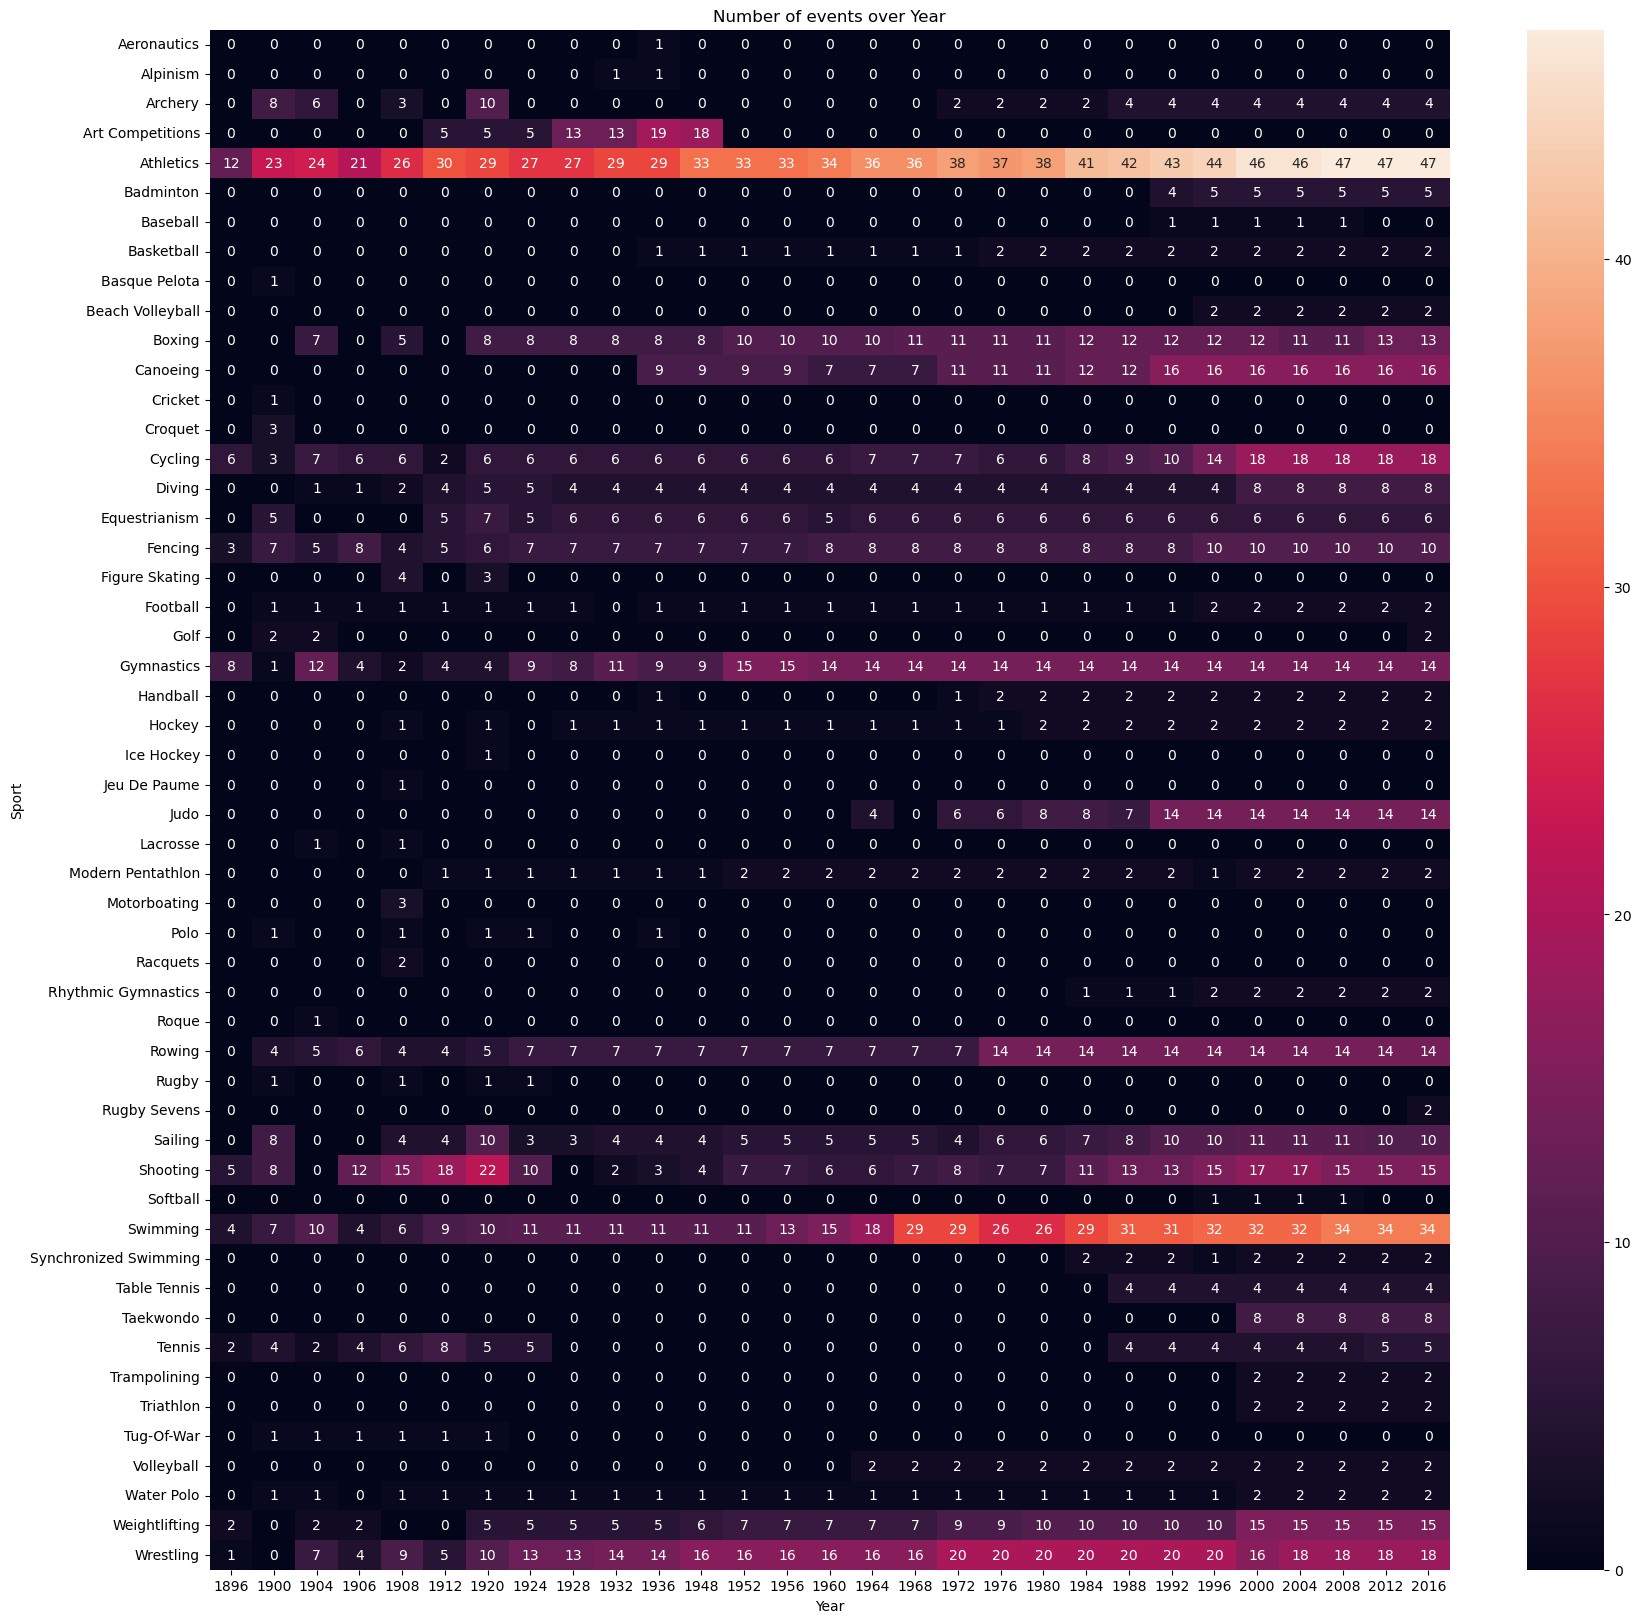

In [46]:
plt.subplots(figsize=(20,20))
sns.heatmap(x, annot=True).set(title ="Number of events over Year")

In [47]:
sport=np.unique(df['Sport'].dropna().values).tolist()
sport.sort()
sport.insert(0,'Overall')
sport

['Overall',
 'Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

In [48]:

def most_successful_sportwise(df, sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != "Overall":
        temp_df= temp_df[temp_df['Sport']==sport]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns={'count':'No. of Medals'},inplace=True)
    return x

In [49]:
most_successful_sportwise(df,'Overall')

Name  No. of Medals  \
0                            Michael Fred Phelps, II             28   
30                Larysa Semenivna Latynina (Diriy-)             18   
49                      Nikolay Yefimovich Andrianov             15   
73                       Borys Anfiyanovych Shakhlin             13   
97                                       Takashi Ono             13   
130                              Edoardo Mangiarotti             13   
144             Dara Grace Torres (-Hoffman, -Minas)             12   
157                          Aleksey Yuryevich Nemov             12   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)             12   
195                           Birgit Fischer-Schmidt             12   
208                               Ryan Steven Lochte             12   
222                             Paavo Johannes Nurmi             12   
234                                       Sawao Kato             12   
258                    Natalie Anne Coughlin (-Hall)             12   
270                   Matthew Nicholas "Matt" Biondi             11   

          Sport   region  
0      Swimming      USA  
30   Gymnastics   Russia  
49   Gymnastics   Russia  
73   Gymnastics   Russia  
97   Gymnastics    Japan  
130     Fencing    Italy  
144    Swimming      USA  
157  Gymnastics   Russia  
178    Swimming      USA  
195    Canoeing  Germany  
208    Swimming      USA  
222   Athletics  Finland  
234  Gymnastics    Japan  
258    Swimming      USA  
270    Swimming      USA

In [50]:
most_successful_sportwise(df,'Gymnastics')

Name  No. of Medals       Sport  \
0    Larysa Semenivna Latynina (Diriy-)             18  Gymnastics   
19         Nikolay Yefimovich Andrianov             15  Gymnastics   
43          Borys Anfiyanovych Shakhlin             13  Gymnastics   
67                          Takashi Ono             13  Gymnastics   
100                          Sawao Kato             12  Gymnastics   
124             Aleksey Yuryevich Nemov             12  Gymnastics   
145           Viktor Ivanovych Chukarin             11  Gymnastics   
161              Vra slavsk (-Odloilov)             11  Gymnastics   
179           gnes Keleti-Srkny (Klein)             10  Gymnastics   
193       Vitaly Venediktovich Shcherbo             10  Gymnastics   
209     Aleksandr Nikolayevich Dityatin             10  Gymnastics   
225         Polina Hryhorivna Astakhova             10  Gymnastics   
244                    Akinori Nakayama             10  Gymnastics   
260       Nadia Elena Comneci (-Conner)              9  Gymnastics   
272           Yury Yevlampiyevich Titov              9  Gymnastics   

             region  
0            Russia  
19           Russia  
43           Russia  
67            Japan  
100           Japan  
124          Russia  
145          Russia  
161  Czech Republic  
179         Hungary  
193          Russia  
209          Russia  
225          Russia  
244           Japan  
260         Romania  
272          Russia

# Country Wise Analysis
<ul>
    <li>Country wise Medal tally per year(line graph)</li>
    <li>What countries are good at(Heatmap)</li>
    <li>Most sucessfull atheletes(top 10)</li>
</ul>

### Country wise Medal tally per year(line graph

In [51]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'], inplace=True)

In [52]:
new_df=temp_df[temp_df['region']=='India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

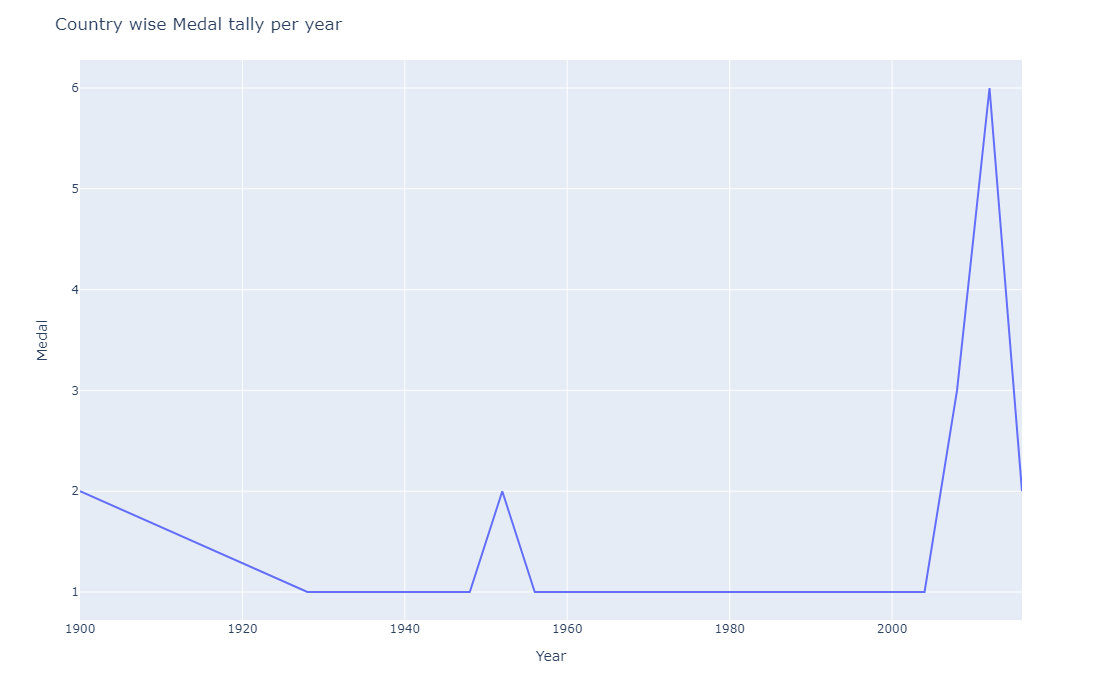

In [53]:
fig= px.line(final_df, x='Year',y='Medal')
fig.update_layout(width=1000,height=700, title="Country wise Medal tally per year")
fig.show()

### What countries are good at(Heatmap)

In [54]:
new_df=temp_df[temp_df['region']=="USA"]
final_df=new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0)

[Text(0.5, 1.0, 'Sports County Good at')]

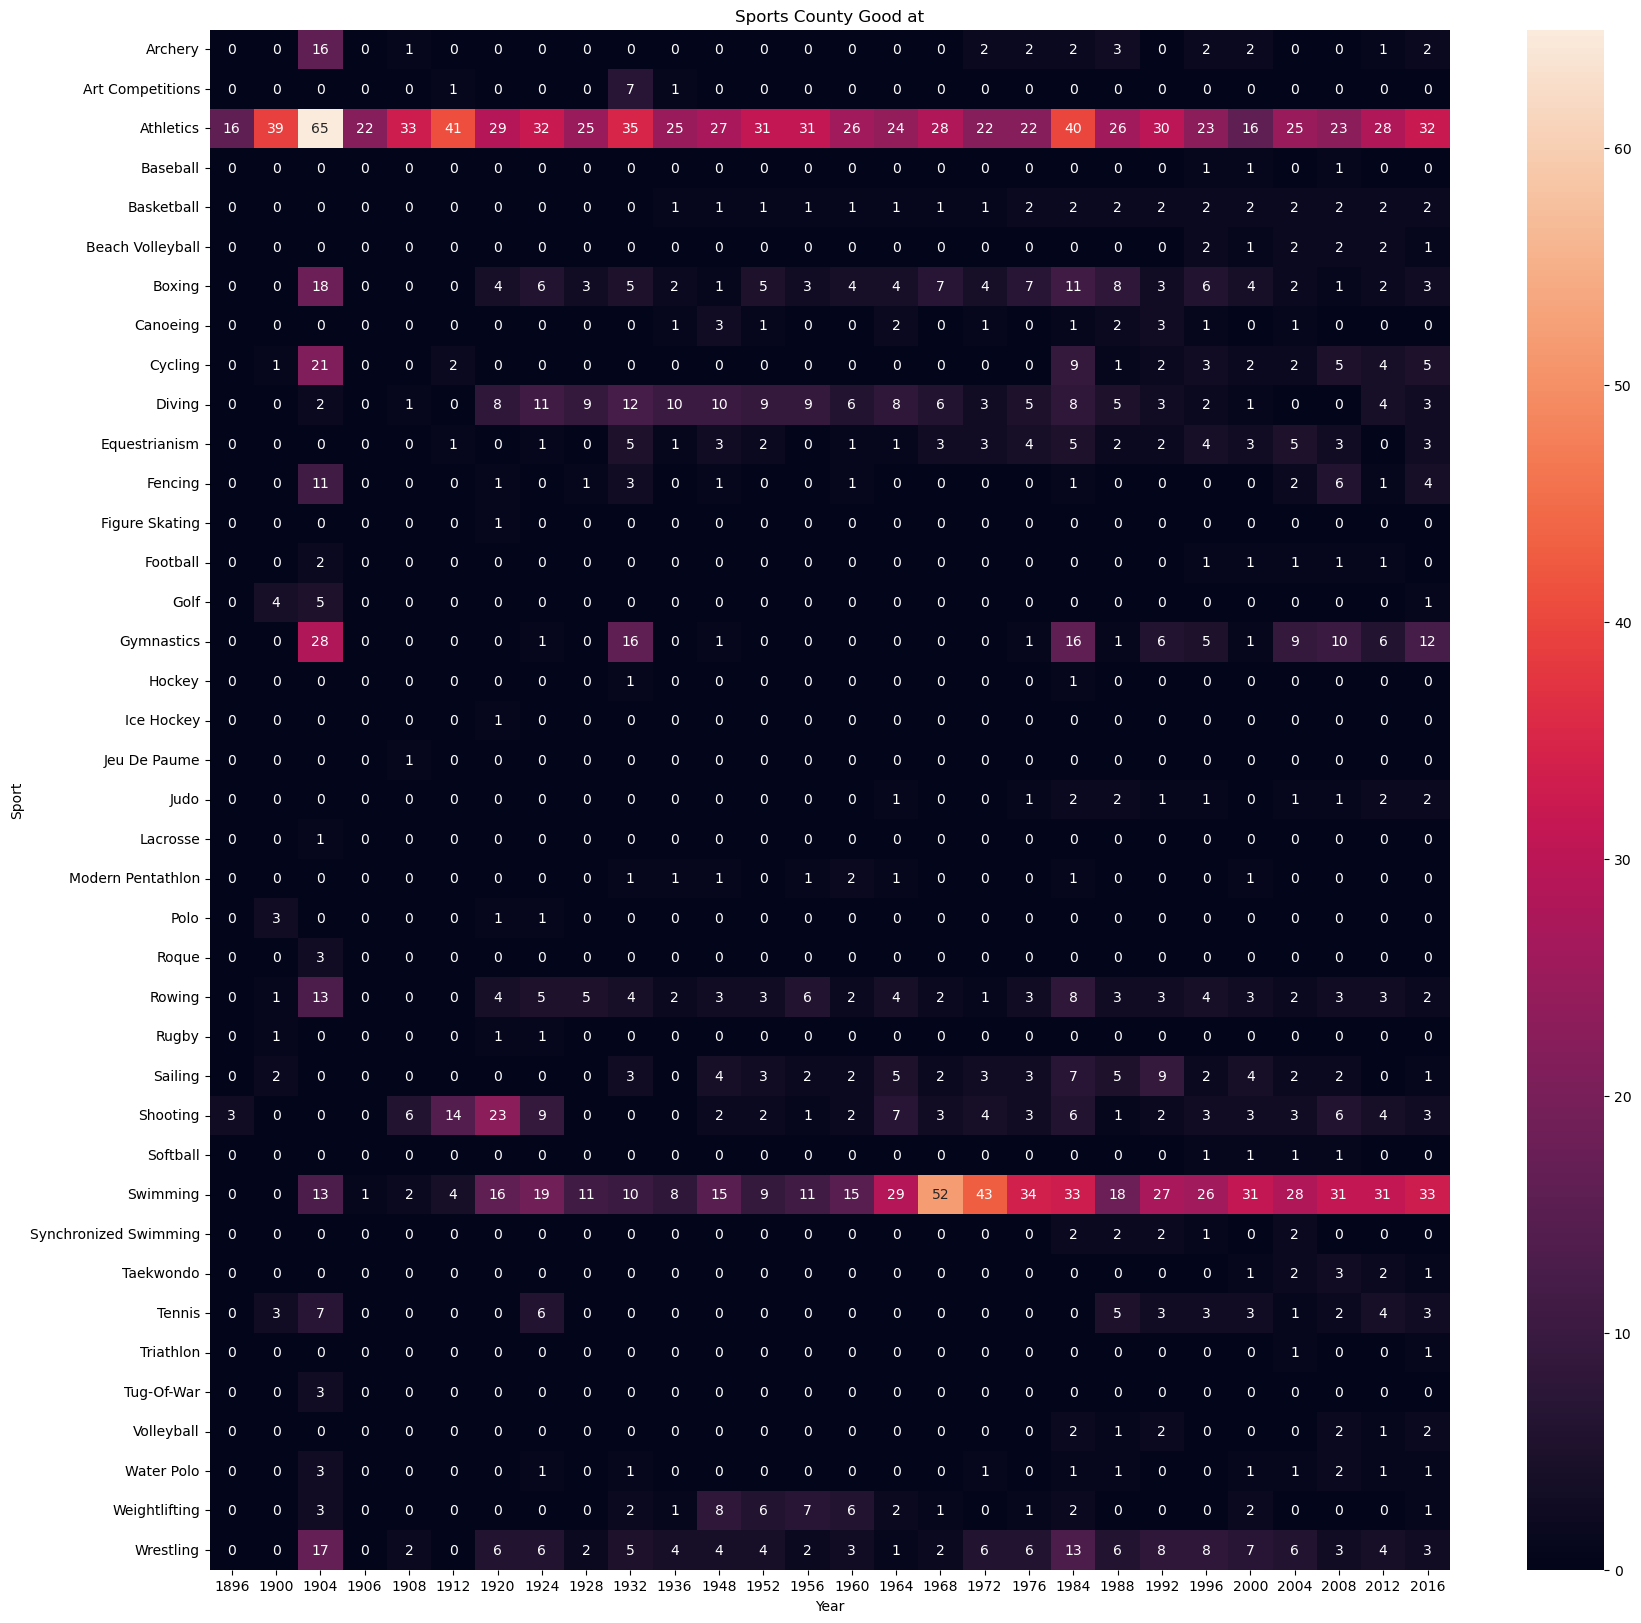

In [55]:
plt.subplots(figsize=(20,20))
sns.heatmap(final_df, annot=True).set(title ="Sports County Good at")

### Most sucessfull atheletes(top 10)

In [56]:
def most_successful_countrywise(df, country):
    temp_df = df.dropna(subset=['Medal'])
    if sport != "Overall":
        temp_df= temp_df[temp_df['region']==country]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport']].drop_duplicates('Name')
    x.rename(columns={'count':'No. of Medals'},inplace=True)
    return x

In [57]:
most_successful_countrywise(df, 'USA')

Name  No. of Medals      Sport
0                            Michael Fred Phelps, II             28   Swimming
30                                Ryan Steven Lochte             12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)             12   Swimming
61                     Natalie Anne Coughlin (-Hall)             12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)             12   Swimming
86                    Matthew Nicholas "Matt" Biondi             11   Swimming
98                              Carl Townsend Osburn             11   Shooting
114                                Mark Andrew Spitz             11   Swimming
126                      Raymond Clarence "Ray" Ewry             10  Athletics
136                   Frederick Carlton "Carl" Lewis             10  Athletics
146                             Gary Wayne Hall, Jr.             10   Swimming
156                           Allyson Michelle Felix              9  Athletics
166                           Martin Joseph Sheridan              9  Athletics
181                        Shirley Frances Babashoff              9   Swimming
192                           Nathan Ghar-Jun Adrian              8   Swimming

# Ahelete Analysis


In [58]:
athelete_df=df.drop_duplicates(subset=['Name','region'])
x=athelete_df['Age'].dropna()
x2=athelete_df[athelete_df['Medal']=='Gold']['Age'].dropna()
x3=athelete_df[athelete_df['Medal']=='Silver']['Age'].dropna()
x4 =athelete_df[athelete_df['Medal']=='Bronze']['Age'].dropna()

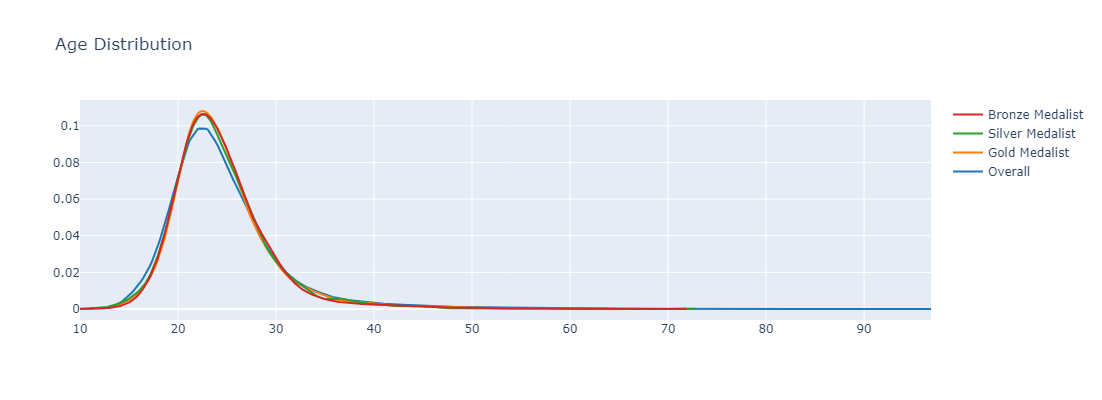

In [59]:
fig=ff.create_distplot([x,x2,x3,x4],['Overall','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.update_layout(
    width=800,  # Width of the figure in pixels
    height=400,  # Height of the figure in pixels
    title='Age Distribution'
)
fig.show()

In [60]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [61]:
x=[]
name=[]
for sport in famous_sports:
    temp_df=athelete_df[athelete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

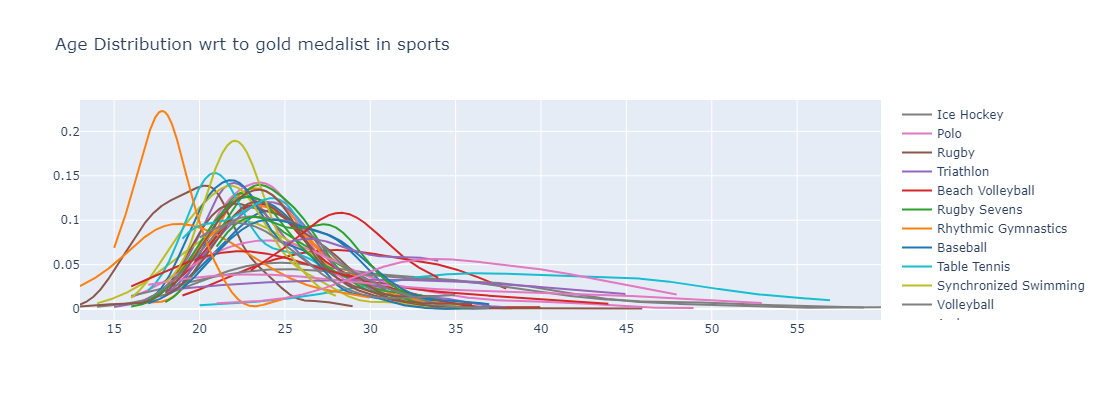

In [62]:
fig=ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig.update_layout(
    width=800,  
    height=400, 
    title='Age Distribution wrt to gold medalist in sports'
)
fig.show()

In [63]:
df['Medal'].fillna('No Medal', inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

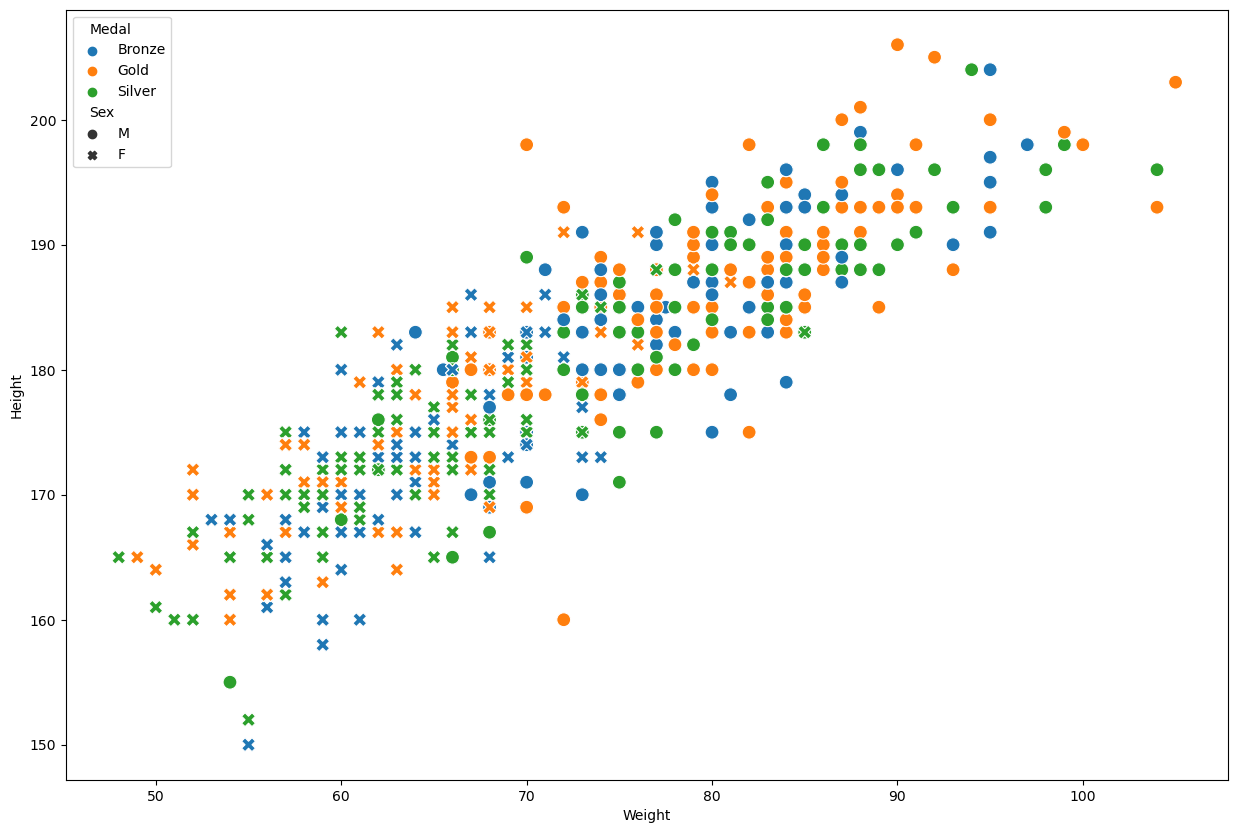

In [64]:
temp_df=athelete_df[athelete_df['Sport']=='Swimming']
plt.figure(figsize=(15, 10))
sns.scatterplot(temp_df,x='Weight',y='Height',hue='Medal',style='Sex',s=100)        #s= dot size


### men vs women participation

In [65]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()


In [66]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)
final.fillna(0, inplace=True)


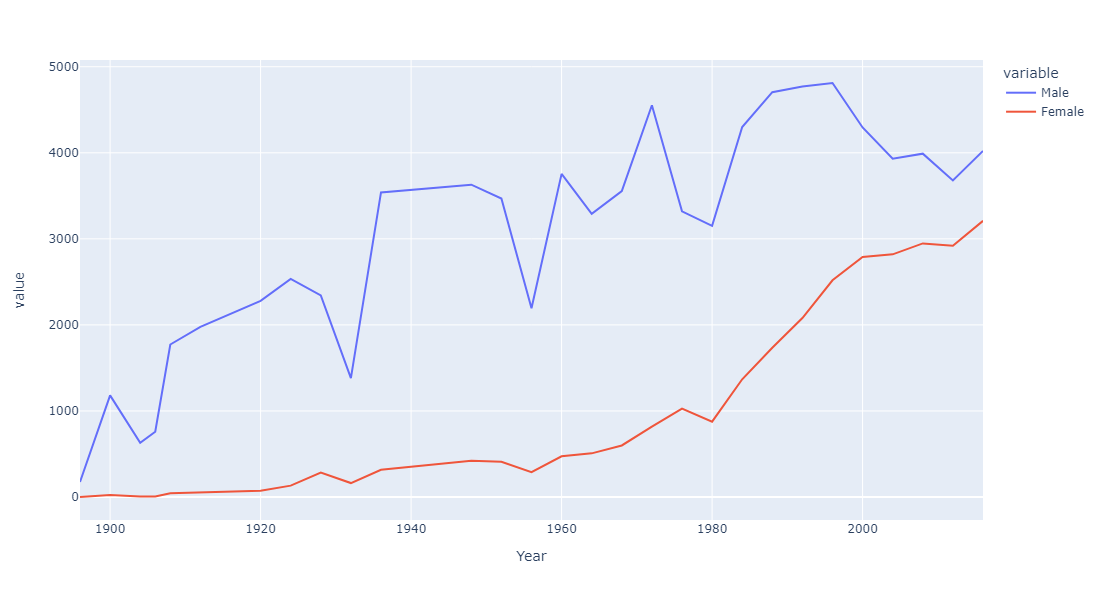

In [67]:
fig = px.line(final, x="Year", y=["Male", "Female"])
fig.update_layout(autosize=False, width=1000, height=600)